# **Preguntas de negocio:**


¿Cuál es el total facturado por cada modelo de negocio (B2B vs B2C)?

¿Qué ciudad generó el mayor volumen de facturación en 2024?

¿Quién es el asesor con más ventas en términos de valor facturado?

¿Cuál es el porcentaje promedio de rentabilidad por departamento?

¿Cuántos clientes únicos hay en cada modelo de negocio?

¿Qué segmento (por ejemplo, "ODONTOPEDIATRIA", "GENERAL") genera más ingresos?

¿Cuántos clientes pertenecen al tipo "ODONTOLOGO"?

¿Qué jefe de grupo o regional maneja el mayor monto de facturación?

¿Cuál es el ticket promedio (venta promedio) por cliente?

¿Hay diferencias significativas de rentabilidad entre ventas B2B y B2C?

¿En qué mes hubo mayor facturación?

¿Qué clientes tienen una rentabilidad superior al 35%?

¿Cuáles son los cinco principales clientes en términos de facturación?

¿Qué porcentaje de ventas proviene de la ciudad de Bucaramanga?

¿Qué departamento tiene la menor facturación total?

In [1]:
# extraer el archivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ruta = '/content/BASE DE DATOS PARA PRUEBA (3).xlsx'
df = pd.read_excel(ruta)



# **ANÀLISIS Y LIMPIEZA DE DATOS**

In [2]:
# analizar los tipos de datos :
df.shape

(4104, 12)

In [4]:
# hacer una copia del df para empezar a generar la limpieza
df_copy = df.copy(deep=True)


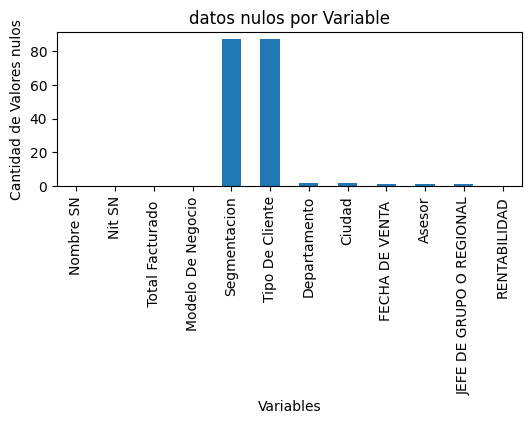

In [5]:
faltantes = df_copy.isnull().sum()
faltantes.plot(kind='bar', figsize=(6, 2))
plt.title('datos nulos por Variable')
plt.xlabel('Variables')
plt.ylabel('Cantidad de Valores nulos')
plt.show()


In [6]:
df_copy

,Nombre SN,Nit SN,Total Facturado,Modelo De Negocio,Segmentacion,Tipo De Cliente,Departamento,Ciudad,FECHA DE VENTA,Asesor,JEFE DE GRUPO O REGIONAL,RENTABILIDAD
0,TREEVEL COMERCIALIZADORA,C000187,41.128.370,B2B,NaN,NaN,Santander,BUCARAMANGA,2024-01-01,VTAS LA MUELA NGC,DIEGOC,0.35
1,BOCANEGRA RIOS PATRICIA,C002620,1.231.932,B2C,ODONTOPEDIATRIA,ODONTOLOGO,BOGOTA D.C.,BOGOTÁ,2024-01-01,P.OMNICANALIDAD,OMNICANALIDAD (OM),0.34
2,GOMEZ GARRIDO LUZ MERY,C005107,239.433,B2C,NaN,NaN,Santander,BUCARAMANGA,2024-01-01,VTAS LA MUELA NGC,DIEGOC,0.33
3,ROJAS RODRIGUEZ JOSE ORLANDO,C005255,214.010,B2C,GENERAL,ODONTOLOGO,Risaralda,PEREIRA,2024-01-01,VN.GLORIA LIDA VALENCIA GIRALDO,REGIONAL OCCIDENTE (ROC),0.32
4,DENTAL SALUD CLINICA ESTETICA ORAL SAS,C001472,2.667.872,B2C,GENERAL,CLINICA ODONTOLOGICA,Santander,BUCARAMANGA,2024-01-02,ALMBU. MARIA ANGELICA AMADO R.,PUNTO DE VENTA (PV),0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
4099,INVERSIONES VESGA SAS,C005625,160.252,B2C,OTRAS PROFESIONES,OTRAS PROFESIONES,Santander,BUCARAMANGA,2024-09-30,PDV S.I. JUAN CAMILO PABON S.,SEGURIDAD INDUSTRIAL,0.13
4100,DIAZ MALDONADO JESSICA DAYANNA,C006175,104.519,B2C,OTRAS PROFESIONES,OTRAS PROFESIONES,Santander,GIRÓN,2024-09-30,P.OMNICANALIDAD,OMNICANALIDAD (OM),0.12
4101,PRADA PARRA BARBARA,C006936,37.200,B2C,OTRAS,ODONTOLOGO,Santander,BUCARAMANGA,2024-09-30,ALMBU. JULIAN GUTIERREZ,PUNTO DE VENTA (PV),0.11
4102,LUZ AMY BONO MARTINEZ,C006940,36.975,B2C,ESTUDIANTE PRE-GRADO,ESTUDIANTE PRE-GRADO,Antioquia,ITAGUI,2024-09-30,T. DPTO. TÉCNICO MEDELLIN,SERVICIO TECNICO (ST),0.10


In [7]:
df_copy.columns

Index(['Nombre SN', 'Nit SN', ' Total Facturado ', 'Modelo De Negocio',
       'Segmentacion', 'Tipo De Cliente', 'Departamento', 'Ciudad',
       'FECHA DE VENTA ', 'Asesor', 'JEFE DE GRUPO O REGIONAL',
       'RENTABILIDAD'],
      dtype='object')

In [8]:
df_copy.columns = (
    df_copy.columns
      .str.strip()                 # elimina espacios al inicio/final
      .str.lower()                 # pasa a minúsculas
      .str.replace(' ', '', regex=False)  # quita todos los espacios intermedios
)

In [9]:
df_copy

,nombresn,nitsn,totalfacturado,modelodenegocio,segmentacion,tipodecliente,departamento,ciudad,fechadeventa,asesor,jefedegrupooregional,rentabilidad
0,TREEVEL COMERCIALIZADORA,C000187,41.128.370,B2B,NaN,NaN,Santander,BUCARAMANGA,2024-01-01,VTAS LA MUELA NGC,DIEGOC,0.35
1,BOCANEGRA RIOS PATRICIA,C002620,1.231.932,B2C,ODONTOPEDIATRIA,ODONTOLOGO,BOGOTA D.C.,BOGOTÁ,2024-01-01,P.OMNICANALIDAD,OMNICANALIDAD (OM),0.34
2,GOMEZ GARRIDO LUZ MERY,C005107,239.433,B2C,NaN,NaN,Santander,BUCARAMANGA,2024-01-01,VTAS LA MUELA NGC,DIEGOC,0.33
3,ROJAS RODRIGUEZ JOSE ORLANDO,C005255,214.010,B2C,GENERAL,ODONTOLOGO,Risaralda,PEREIRA,2024-01-01,VN.GLORIA LIDA VALENCIA GIRALDO,REGIONAL OCCIDENTE (ROC),0.32
4,DENTAL SALUD CLINICA ESTETICA ORAL SAS,C001472,2.667.872,B2C,GENERAL,CLINICA ODONTOLOGICA,Santander,BUCARAMANGA,2024-01-02,ALMBU. MARIA ANGELICA AMADO R.,PUNTO DE VENTA (PV),0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
4099,INVERSIONES VESGA SAS,C005625,160.252,B2C,OTRAS PROFESIONES,OTRAS PROFESIONES,Santander,BUCARAMANGA,2024-09-30,PDV S.I. JUAN CAMILO PABON S.,SEGURIDAD INDUSTRIAL,0.13
4100,DIAZ MALDONADO JESSICA DAYANNA,C006175,104.519,B2C,OTRAS PROFESIONES,OTRAS PROFESIONES,Santander,GIRÓN,2024-09-30,P.OMNICANALIDAD,OMNICANALIDAD (OM),0.12
4101,PRADA PARRA BARBARA,C006936,37.200,B2C,OTRAS,ODONTOLOGO,Santander,BUCARAMANGA,2024-09-30,ALMBU. JULIAN GUTIERREZ,PUNTO DE VENTA (PV),0.11
4102,LUZ AMY BONO MARTINEZ,C006940,36.975,B2C,ESTUDIANTE PRE-GRADO,ESTUDIANTE PRE-GRADO,Antioquia,ITAGUI,2024-09-30,T. DPTO. TÉCNICO MEDELLIN,SERVICIO TECNICO (ST),0.10


In [10]:
# 1) Sustituye '-' por NaN
df_copy['totalfacturado'] = df_copy['totalfacturado'].replace('-', np.nan)

# 2) Limpiar símbolos restantes (NBSP, $, puntos, comas)
df_copy['totalfacturado'] = (
    df_copy['totalfacturado']
      .astype(str)
      .str.replace(r'[\xa0\$\.,]', '', regex=True)
      .str.strip()
)

# 3) Convertir a float, convirtiendo todo lo no numérico (incluidos los '') en NaN
df_copy['totalfacturado'] = pd.to_numeric(df_copy['totalfacturado'], errors='coerce')



In [11]:
df_copy.isnull().sum()

,0
nombresn,0
nitsn,0
totalfacturado,33
modelodenegocio,0
segmentacion,87
tipodecliente,87
departamento,2
ciudad,2
fechadeventa,1
asesor,1


In [12]:
# Imputación por KNN a la columna totalfacturado

from sklearn.impute import KNNImputer

# Crear el imputador
inputador = KNNImputer(n_neighbors=5)

# Asegurarse de que 'totalfacturado' esté en formato 2D (reshape)
df_copy['totalfacturado'] = pd.DataFrame(
    inputador.fit_transform(df_copy[['totalfacturado']]),
    columns=['totalfacturado']
)


In [13]:
# inputar por moda la columna segmentacion
df_copy['segmentacion'] = df_copy['segmentacion'].fillna(df_copy['segmentacion'].mode()[0])

In [14]:
# inputar por moda la columna tipodecliente
df_copy['tipodecliente'] = df_copy['tipodecliente'].fillna(df_copy['tipodecliente'].mode()[0])

In [20]:
# inputacion de las columnas Departamento, Ciudad,fechadeventa, jefedegrupooregional y asesor con el metodo fill
df_copy['departamento']= df_copy['departamento'].fillna(method='ffill')
df_copy['ciudad'] = df_copy['ciudad'].fillna(method='ffill')
df_copy['fechadeventa'] = df_copy['fechadeventa'].fillna(method='ffill')
df_copy['asesor'] = df_copy['asesor'].fillna(method='ffill')
df_copy['jefedegrupooregional'] = df_copy['jefedegrupooregional'].fillna(method='ffill')

<ipython-input-20-114fc57cf7c8>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy['departamento']= df_copy['departamento'].fillna(method='ffill')
<ipython-input-20-114fc57cf7c8>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy['ciudad'] = df_copy['ciudad'].fillna(method='ffill')
<ipython-input-20-114fc57cf7c8>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy['fechadeventa'] = df_copy['fechadeventa'].fillna(method='ffill')
<ipython-input-20-114fc57cf7c8>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy['asesor'] = df_copy['asesor'].fillna(method='ffill')
<ipython-input-20-114fc57cf7c8>:6: FutureWarning: Ser

In [21]:
df_copy.isnull().sum()

,0
nombresn,0
nitsn,0
totalfacturado,0
modelodenegocio,0
segmentacion,0
tipodecliente,0
departamento,0
ciudad,0
fechadeventa,0
asesor,0



# **RESOLUCIÓN** DE PREGUNTAS DEL NEGOCIO



In [56]:
#¿Cuál es el total facturado por cada modelo de negocio (B2B vs B2C)?
df_copy.groupby('modelodenegocio')['totalfacturado'].sum().apply(lambda x: f"${x:,.2f}").reset_index()


,modelodenegocio,totalfacturado
0,B2B,"$10,491,728,847.93"
1,B2C,"$6,050,427,211.35"
2,B2G,"$11,159,796,011.32"


In [76]:
#¿Qué ciudad generó el mayor volumen de facturación en 2024?
ciudad_top = df_copy[df_copy['fechadeventa'].dt.year == 2024]\
    .groupby('ciudad')['totalfacturado'].count()\
    .sort_values(ascending=False)\
    .head(1)\
    .apply(lambda x: f"${x:,.2f}")\
    .reset_index()

ciudad_nombre = ciudad_top.at[0, 'ciudad']
total_facturado = ciudad_top.at[0, 'totalfacturado']
print(f'la ciudad que mas facturo es {ciudad_nombre} con un total de facturas {total_facturado} ')



la ciudad que mas facturo es BUCARAMANGA con un total de facturas $1,216.00 facturas


In [79]:
#¿Quién es el asesor con más ventas en términos de valor facturado?
asesor_top = df_copy.groupby('asesor')['totalfacturado'].sum().sort_values(ascending=False).head(1).apply(lambda x: f"${x:,.2f}").reset_index()
asesor_top

,asesor,totalfacturado
0,C.LUDOVINA BALZA,"$2,566,978,983.00"


In [114]:
#¿Cuál es el porcentaje promedio de rentabilidad por departamento?
rentabilidad_por_departamento = df_copy.groupby('departamento')['rentabilidad'].mean().apply(lambda x: f"{x:.2%}").reset_index()
rentabilidad_por_departamento

,departamento,rentabilidad
0,Amazonas,27.50%
1,Antioquia,22.44%
2,Arauca,21.09%
3,Atlántico,20.61%
4,BOGOTA D.C.,21.80%
5,Bolívar,22.80%
6,Boyacá,20.00%
7,Caldas,20.17%
8,Caquetá,19.18%
9,Casanare,22.13%


In [83]:
#¿Cuántos clientes únicos hay en cada modelo de negocio?
clientes_unicos = df_copy.groupby('modelodenegocio')['tipodecliente'].nunique()
clientes_unicos


,tipodecliente
modelodenegocio,
B2B,8
B2C,10
B2G,2


In [87]:
# ¿Qué segmento (por ejemplo, "ODONTOPEDIATRIA", "GENERAL") genera más ingresos?
segmento_top = df_copy.groupby('segmentacion')['totalfacturado'].sum().sort_values(ascending=False).head(1).apply(lambda x: f"${x:,.2f}").reset_index()
segmento_top



,segmentacion,totalfacturado
0,MAYORISTA/ DEPOSITO,"$6,281,964,457.32"


In [90]:
# ¿Cuántos clientes pertenecen al tipo "ODONTOLOGO"?
clientes_odontologo = df_copy[df_copy['tipodecliente'] == 'ODONTOLOGO'].shape[0]
clientes_odontologo

1726

In [96]:
#¿Qué jefe de grupo o regional maneja el mayor monto de facturación?
jefedegrupooregional_top = df_copy.groupby('jefedegrupooregional')['totalfacturado'].sum().sort_values(ascending=False).head(1).apply(lambda x: f"${x:,.2f}").reset_index()
jefedegrupooregional_top

,jefedegrupooregional,totalfacturado
0,REGIONAL OCCIDENTE (ROC),"$5,385,896,368.21"


In [117]:
#¿Cuál es el ticket promedio (venta promedio) por cliente?
tiket_promedio = df_copy.groupby('nombresn')['totalfacturado'].mean().apply(lambda x: f"${x:,.2f}").reset_index().rename(columns={'totalfacturado': 'tiket_promedio'})

tiket_promedio


,nombresn,tiket_promedio
0,+IPSMEDIC SAS,"$444,121.00"
1,100% MEDIOS S.A.S,"$47,059.00"
2,14-85 DENTAL SPA SAS,"$11,114,989.00"
3,1DENTAL S.A.S,"$292,941.00"
4,A B C DENTAL S.A.S.,"$278,035,661.00"
...,...,...
4099,ZULUAGA GOYENECHE DANIEL,"$164,435.00"
4100,ZULUAGA POSADA MARIA ELENA,"$331,866.00"
4101,ZUÑIGA MARIA MERCEDES,"$450,000.00"
4102,ZUÑIGA SANCHEZ ISABEL CRISTINA,"$243,697.00"


In [130]:
#¿Hay diferencias significativas de rentabilidad entre ventas B2B , B2G y B2C?
rentabilidad_por_modelodenegocio = df_copy.groupby('modelodenegocio')['rentabilidad'].mean().apply(lambda x: f"{x:.2%}").reset_index()
rentabilidad_por_modelodenegocio




,modelodenegocio,rentabilidad
0,B2B,21.97%
1,B2C,22.05%
2,B2G,21.10%


In [132]:
#¿En qué mes hubo mayor facturación?
mes_top = df_copy.groupby(df_copy['fechadeventa'].dt.month)['totalfacturado'].sum().sort_values(ascending=False).head(1).apply(lambda x: f"${x:,.2f}").reset_index()
mes_top



,fechadeventa,totalfacturado
0,3,"$7,789,975,149.00"


In [145]:
#¿Qué clientes tienen una rentabilidad superior o igual al 35%?
clientes_rentabilidad_superior = df_copy[df_copy['rentabilidad'] >= 0.35]
clientes_rentabilidad_superior['nombresn']

,nombresn
0,TREEVEL COMERCIALIZADORA
27,CONTRERAS TOLOZA JHON ALEX
54,CUIDADOS RESPIRATORIOS INTEGRALES SAS
81,GRUPO DENTAL DE COLOMBIA S.A.S.
108,ZUÑIGA SANCHEZ ISABEL CRISTINA
...,...
3969,JADAR ELECTROMEDICINA S.A.S
3996,DIEZ LEDESMA DANIELA JOHANNA
4023,DERMOCOSMÉTICOS DE SANTANDER S.A.S.
4050,ESTRADA TAPIAS JHON JAIRO


In [146]:
#¿Cuáles son los cinco principales clientes en términos de facturación?
clientes_top = df_copy.groupby('nombresn')['totalfacturado'].sum().sort_values(ascending=False).head(5).apply(lambda x: f"${x:,.2f}").reset_index()
clientes_top

,nombresn,totalfacturado
0,VIVA 1A IPS S.A,"$2,566,978,983.00"
1,SOLUCIONES INTEGRALES AL SERVICIO DE LA SALUD SAS,"$1,973,690,522.00"
2,EMPRESA SOCIAL DEL ESTADO JAIME ALVARADO Y CAS...,"$1,172,245,900.00"
3,INVERSIONES NOVO S.A.S,"$641,682,632.00"
4,FONDO ROTATORIO DE LA POLICIA NACIONAL,"$619,950,000.00"


In [171]:
#¿Qué porcentaje de ventas proviene de la ciudad de Bucaramanga?
total_ventas = df_copy['totalfacturado'].sum()  # Suma total de ventas
ventas_bucaramanga = df_copy[df_copy['ciudad'] == 'BUCARAMANGA']['totalfacturado'].sum()  # Ventas de Bucaramanga
ventas_bucaramanga
# Calcular el porcentaje
porcentaje_bucaramanga = (ventas_bucaramanga / total_ventas) * 100
porcentaje_bucaramanga = f"{porcentaje_bucaramanga:.2f}%"

print(f"el pocentaje de ventas de BUCARAMANGA es de : {porcentaje_bucaramanga}")


el pocentaje de ventas de BUCARAMANGA es de : 9.07%


In [172]:
#¿Qué departamento tiene la menor facturación total?
departamento_menor_facturacion = df_copy.groupby('departamento')['totalfacturado'].sum().sort_values(ascending=True).head(1).apply(lambda x: f"${x:,.2f}").reset_index()
departamento_menor_facturacion

,departamento,totalfacturado
0,SAN ANDRES Y PROVIDENCIA,"$672,440.00"
